In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
samples = ["CX113C","CX113E","CX113F","CX113H","CX115H","CX1138","Neige_2_3","Neige_3_2","Neige_4", "greek_wolf", "slov_bear"]
taxa = ["Bear", "Bear", "Wolf", "Wolf", "Bear", "Bear", "Wolf", "Wolf", "Wolf", "Wolf", "Bear"]
lims_all = [20,20,20,20,20,20,90,20,20,100,100]
lims_min = [1,2,1,0.5,0.5,5,100,0.5,0.5,100,100]

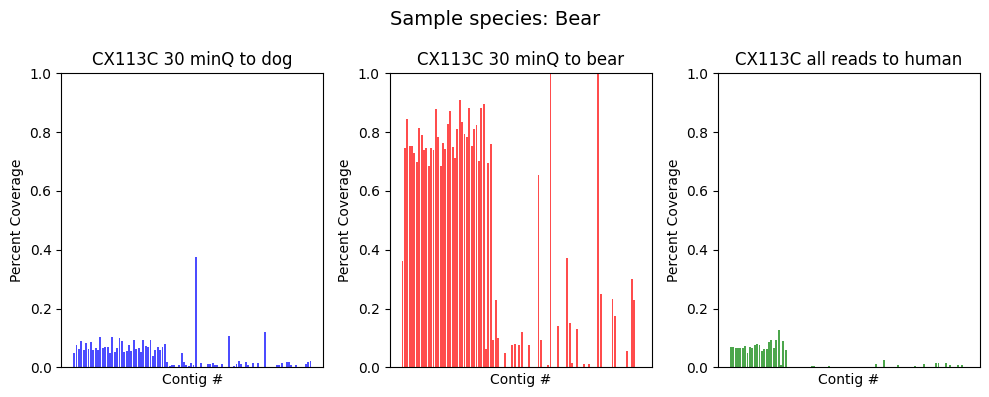

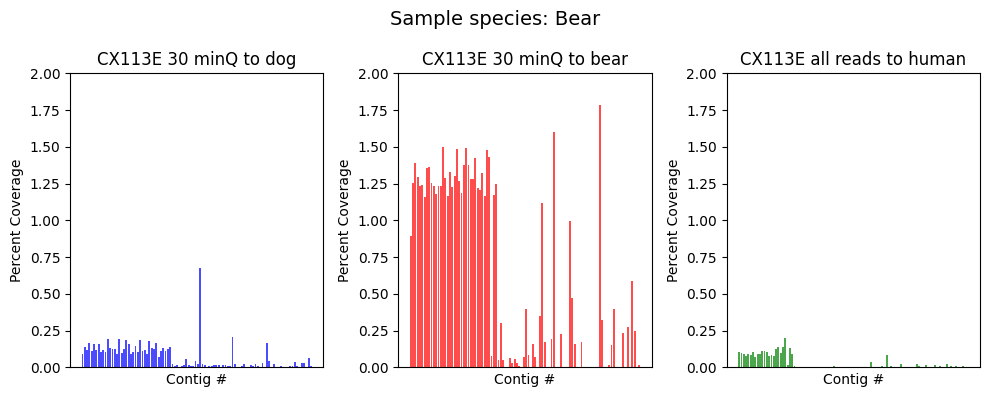

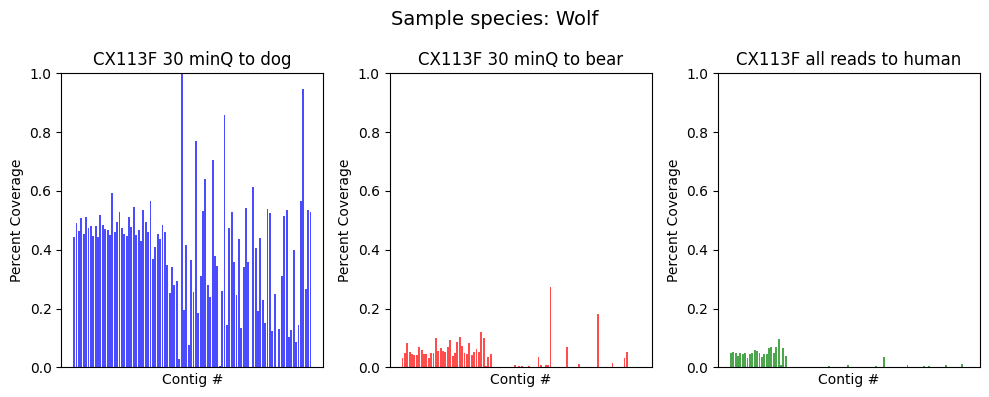

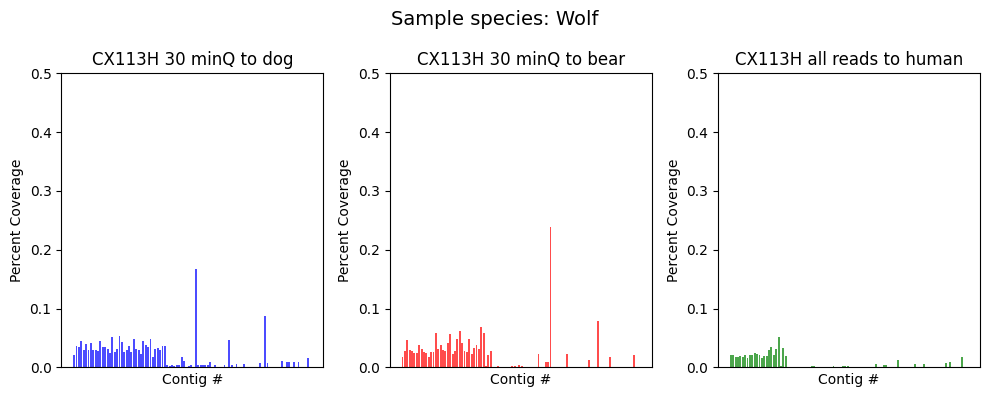

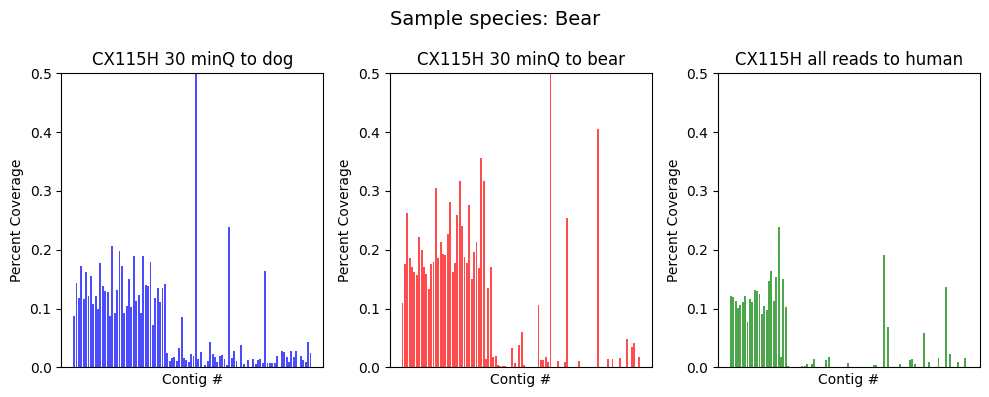

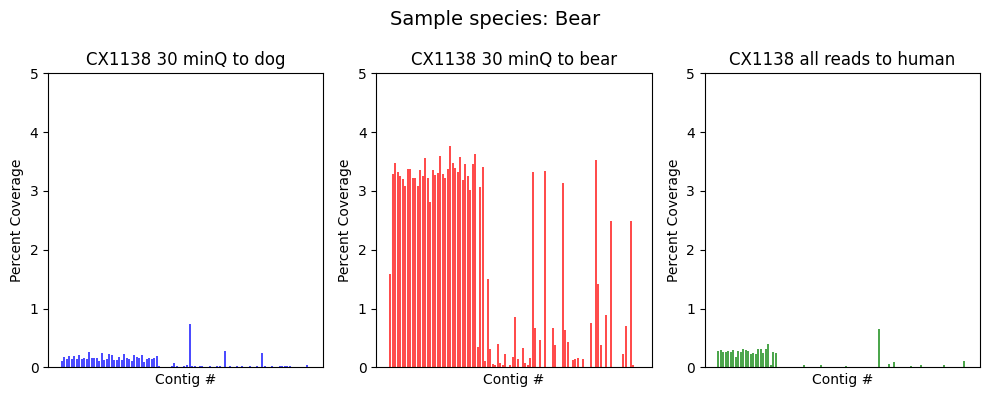

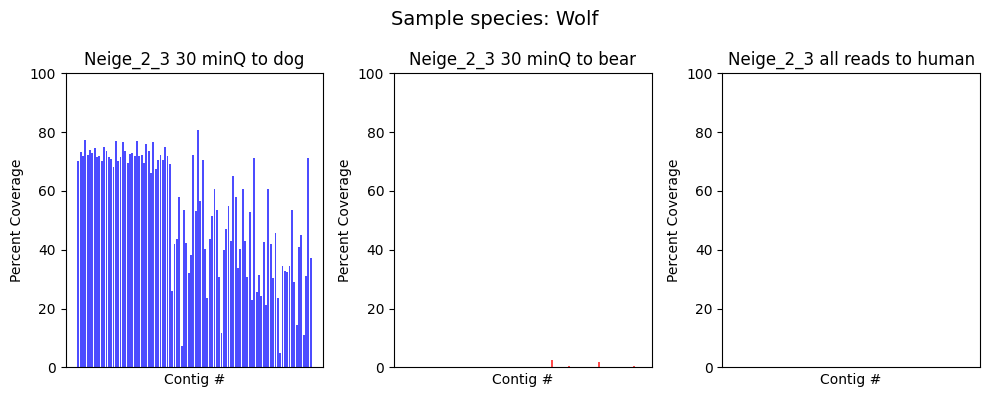

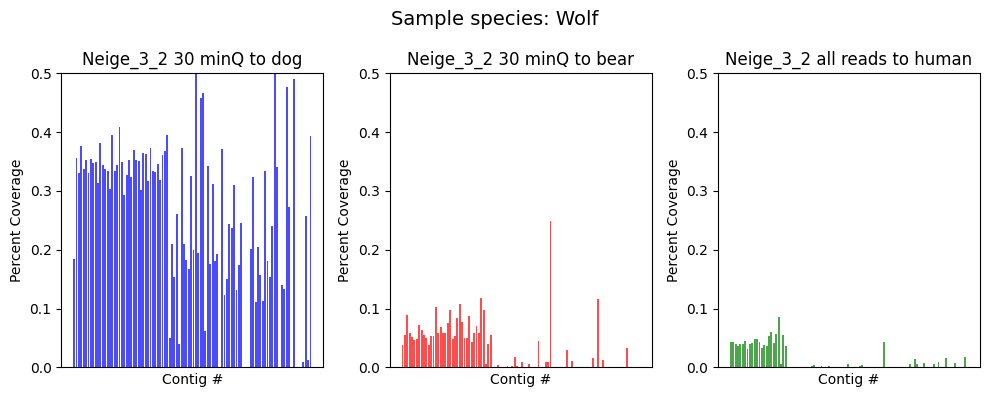

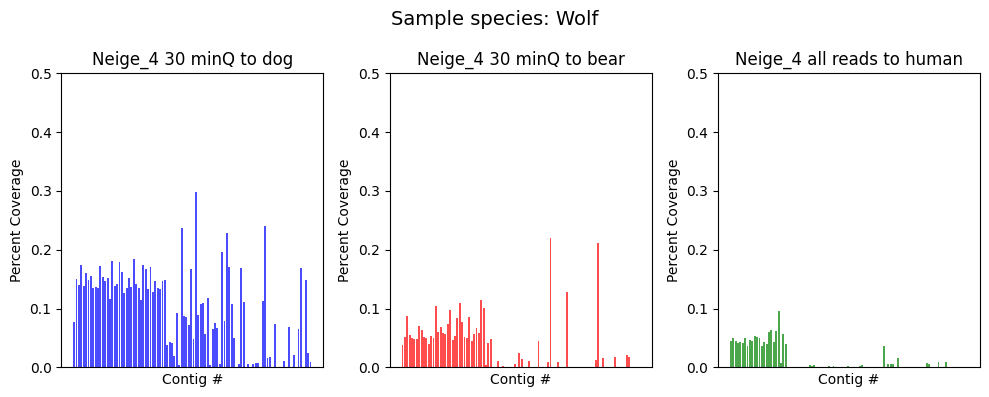

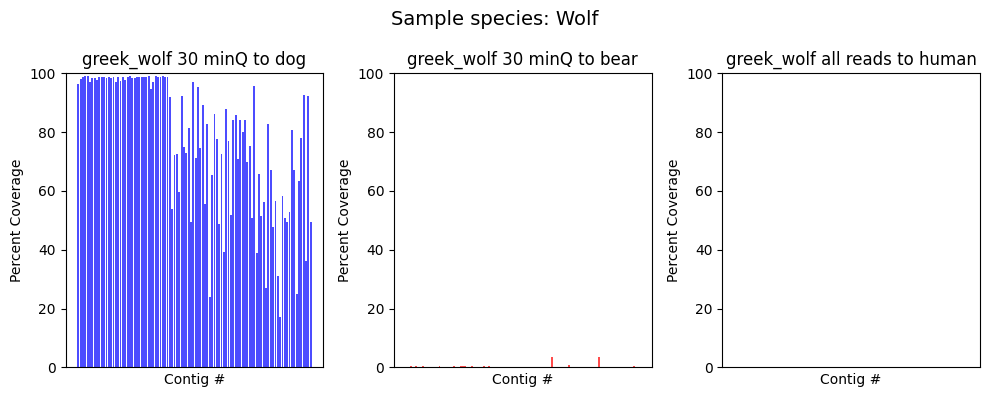

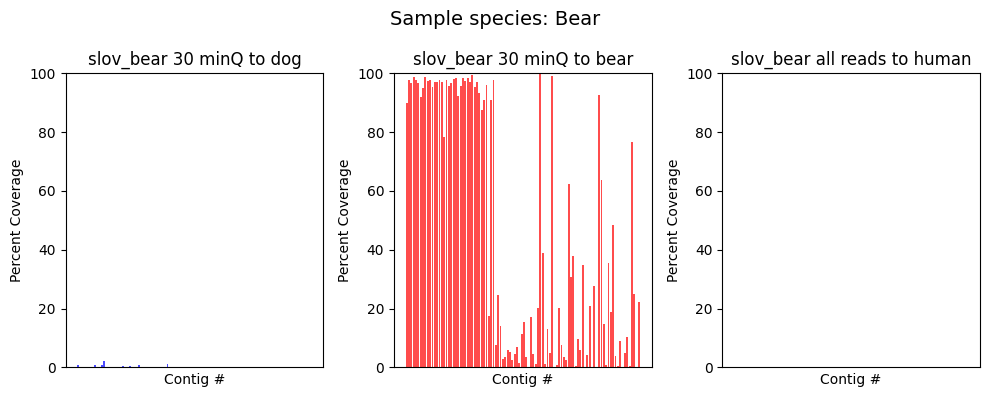

In [33]:
for i in range(len(samples)):
    df = pd.read_csv(f"./3ref_data/{samples[i]}.comp3.cov.tsv", sep='\t', header=0)
    dog =  df[df["#rname"].str.contains("dog")].sort_values(by="endpos", ascending=False)
    bear = df[df["#rname"].str.contains("bear")].sort_values(by="endpos", ascending=False)
    human = df[df["#rname"].str.contains("human")].sort_values(by="endpos", ascending=False)
    
    df2 = pd.read_csv(f"./3ref_data/{samples[i]}.comp3.minq.tsv", sep='\t', header=0)
    dog_min =  df2[df2["#rname"].str.contains("dog")].sort_values(by="endpos", ascending=False)
    bear_min = df2[df2["#rname"].str.contains("bear")].sort_values(by="endpos", ascending=False)
    human_min = df2[df2["#rname"].str.contains("human")].sort_values(by="endpos", ascending=False)

    # Set bar width
    bar_width = 0.8

    # Set positions for bars
    x = np.arange(100)
    # Create the figure and axis
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    # Plot bars
    axes[0].bar(x, dog['coverage'][0:100], width=bar_width, label='Dog', alpha=0.7, color='b')
    axes[1].bar(x, bear['coverage'][0:100], width=bar_width, label='bear', alpha=0.7, color='r')
    axes[2].bar(x, human['coverage'][0:100], width=bar_width, label='human', alpha=0.7, color='g')

    # Set labels and title
    axes[0].set_xticks([])
    axes[0].set_xticklabels("")
    axes[0].set_ylabel('Percent Coverage')
    axes[0].set_xlabel('Contig #')
    axes[0].set_title(f'{samples[i]} all reads to dog')
    axes[0].set_ylim(0, lims_all[i])

    axes[1].set_xticks([])
    axes[1].set_xticklabels("")
    axes[1].set_ylabel('Percent Coverage')
    axes[1].set_xlabel('Contig #')
    axes[1].set_title(f'{samples[i]} all reads to bear')
    axes[1].set_ylim(0, lims_all[i])

    axes[2].set_xticks([])
    axes[2].set_xticklabels("")
    axes[2].set_ylabel('Percent Coverage')
    axes[2].set_xlabel('Contig #')
    axes[2].set_title(f'{samples[i]} all reads to human')
    axes[2].set_ylim(0, lims_all[i])

    fig.suptitle(f"Sample species: {taxa[i]}", fontsize=14)
    
    # Show the plot
    plt.tight_layout()
    plt.savefig(f"./figures/comp3/{samples[i]}_pc_cov_all.png", dpi=600)
    plt.close(fig)

    ## for min MAPQ 30
    # Set bar width
    bar_width = 0.8

    # Set positions for bars
    x = np.arange(100)
    # Create the figure and axis
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    # Plot bars
    axes[0].bar(x, dog_min['coverage'][0:100], width=bar_width, label='Dog', alpha=0.7, color='b')
    axes[1].bar(x, bear_min['coverage'][0:100], width=bar_width, label='Bear', alpha=0.7, color='r')
    axes[2].bar(x, human_min['coverage'][0:100], width=bar_width, label='Human', alpha=0.7, color='g')

    # Set labels and title
    axes[0].set_xticks([])
    axes[0].set_xticklabels("")
    axes[0].set_ylabel('Percent Coverage')
    axes[0].set_xlabel('Contig #')
    axes[0].set_title(f'{samples[i]} 30 minQ to dog')
    axes[0].set_ylim(0, lims_min[i])

    axes[1].set_xticks([])
    axes[1].set_xticklabels("")
    axes[1].set_ylabel('Percent Coverage')
    axes[1].set_xlabel('Contig #')
    axes[1].set_title(f'{samples[i]} 30 minQ to bear')
    axes[1].set_ylim(0, lims_min[i])

    axes[2].set_xticks([])
    axes[2].set_xticklabels("")
    axes[2].set_ylabel('Percent Coverage')
    axes[2].set_xlabel('Contig #')
    axes[2].set_title(f'{samples[i]} all reads to human')
    axes[2].set_ylim(0, lims_min[i])

    fig.suptitle(f"Sample species: {taxa[i]}", fontsize=14)

    # Show the plot
    plt.tight_layout()
    plt.savefig(f"./figures/comp3/{samples[i]}_pc_cov_q30.png", dpi=600)